In [109]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
# using matplotlib as backend
%matplotlib inline

In [47]:
# load_dataset
df = pd.read_csv("C:/Users/NOOMAN KHAN/Desktop/Khan/Masai/New folder (2)/car-mpg.csv")
df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [49]:
df["car_name"].nunique()

305

In [50]:
# drop car name column
df = df.drop("car_name" , axis = 1)

In [51]:
df["hp"] = pd.to_numeric(df["hp"] , errors = "coerce")

In [52]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

In [54]:
df["hp"] = df["hp"].fillna(df["hp"].median())

In [55]:
# checking null
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

No Null

In [56]:
# Replace the numbers in categorical variables with the actual country names in the origin col
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [57]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130.0,3504,12.0,70,america,0
1,15.0,8,350.0,165.0,3693,11.5,70,america,0
2,18.0,8,318.0,150.0,3436,11.0,70,america,0
3,16.0,8,304.0,150.0,3433,12.0,70,america,0
4,17.0,8,302.0,140.0,3449,10.5,70,america,0


In [58]:
df = pd.get_dummies(data = df , columns=["origin"] ,drop_first=True)

In [59]:
df

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,1,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [60]:
# descriptive analysis of data
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.530151,0.198492,0.175879
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.499718,0.399367,0.381197
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            392 non-null    float64
 1   cyl            392 non-null    int64  
 2   disp           392 non-null    float64
 3   hp             392 non-null    float64
 4   wt             392 non-null    int64  
 5   acc            392 non-null    float64
 6   yr             392 non-null    int64  
 7   car_type       392 non-null    int64  
 8   origin_asia    392 non-null    uint8  
 9   origin_europe  392 non-null    uint8  
dtypes: float64(4), int64(4), uint8(2)
memory usage: 28.3 KB


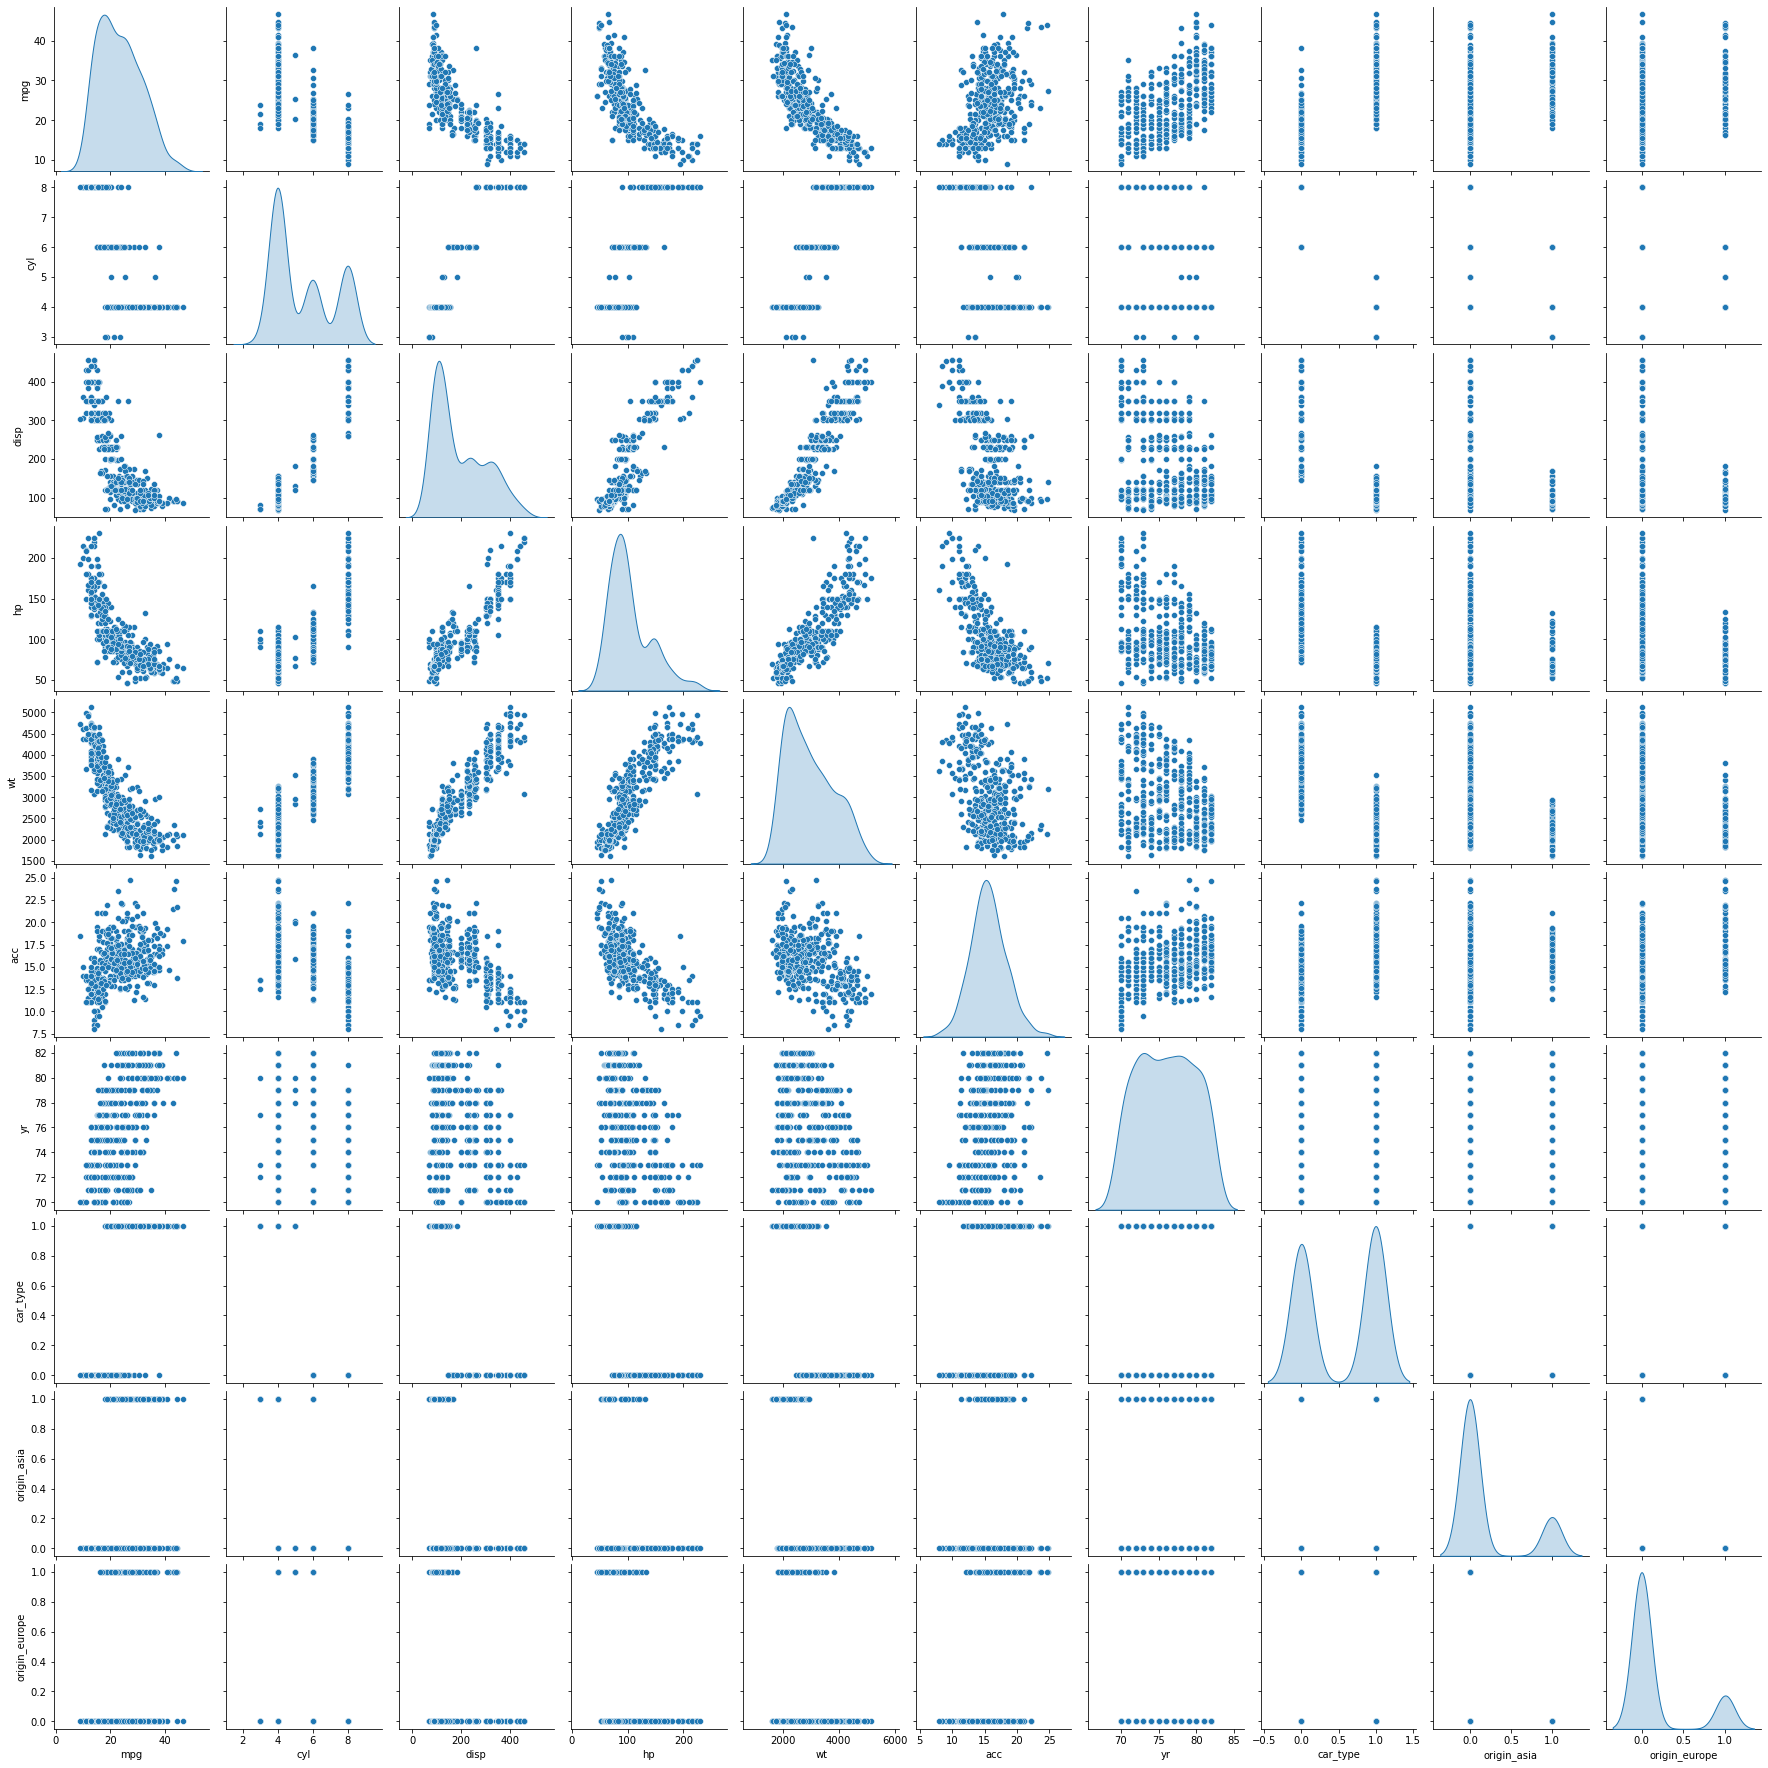

In [61]:
# pairplot
sns.pairplot(df , diag_kind = "kde")

<AxesSubplot:>

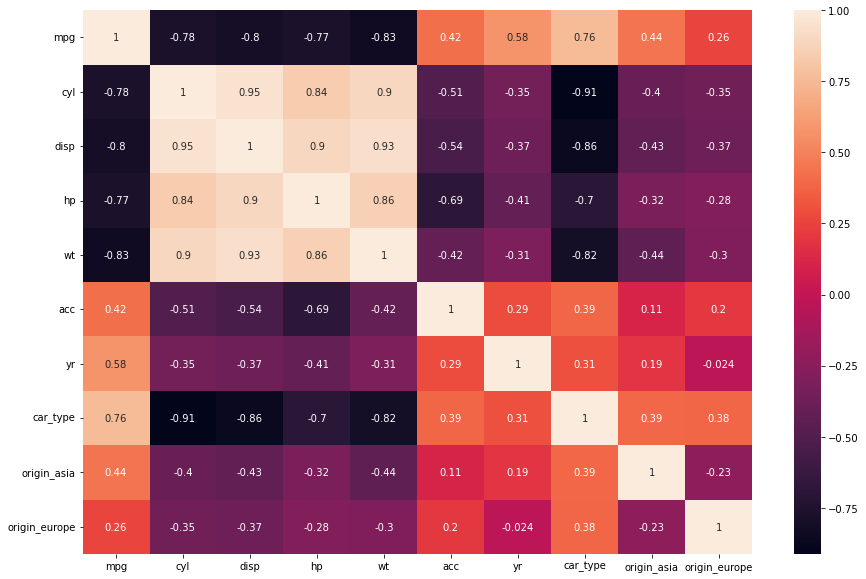

In [62]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr() , annot = True)


In [66]:
X = df.drop("mpg" , axis = 1).values
Y = df[["mpg"]].values

In [67]:
X

array([[  8., 307., 130., ...,   0.,   0.,   0.],
       [  8., 350., 165., ...,   0.,   0.,   0.],
       [  8., 318., 150., ...,   0.,   0.,   0.],
       ...,
       [  4., 135.,  84., ...,   1.,   0.,   0.],
       [  4., 120.,  79., ...,   1.,   0.,   0.],
       [  4., 119.,  82., ...,   1.,   0.,   0.]])

In [70]:
from sklearn.model_selection import train_test_split 
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 42)


In [72]:
len(X_train)

318

In [73]:
len(X_test)

80

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [78]:
from sklearn.linear_model import LinearRegression 
le = LinearRegression()
le.fit(X_train , Y_train)

LinearRegression()

In [99]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, le.coef_[0][idx]))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [100]:
intercept = le.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 23.60817610062894


In [82]:
Y_pred = le.predict(X_test)
# Y_pred

In [83]:
from sklearn import metrics
metrics.mean_squared_error(Y_test , Y_pred)

7.2774946113923935

In [86]:
metrics.r2_score(Y_test , Y_pred)

0.8646461602476285

In [88]:
Y_pred = le.predict(X_train)
metrics.r2_score(Y_train , Y_pred)

0.8354083926209322

OLS Method

In [94]:
df

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,1,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [96]:
import statsmodels.formula.api as smf
mpg_ols = smf.ols(formula = 'mpg~ cyl+disp+hp+wt+acc+yr+car_type+origin_asia+origin_europe',data= df).fit()

In [98]:
print(mpg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     228.6
Date:                Mon, 14 Nov 2022   Prob (F-statistic):          3.91e-149
Time:                        21:28:30   Log-Likelihood:                -1016.2
No. Observations:                 398   AIC:                             2052.
Df Residuals:                     388   BIC:                             2092.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -26.8120      4.565     -5.874

In [103]:
Y_test.ravel()

array([33. , 28. , 19. , 13. , 14. , 27. , 24. , 13. , 17. , 21. , 15. ,
       38. , 26. , 15. , 25. , 12. , 31. , 17. , 16. , 31. , 22. , 22. ,
       22. , 33.5, 18. , 44. , 26. , 24.5, 18.1, 12. , 27. , 36. , 23. ,
       24. , 37.2, 16. , 21. , 19.2, 16. , 29. , 26.8, 27. , 18. , 10. ,
       23. , 36. , 26. , 25. , 25. , 25. , 22. , 34.1, 32.4, 13. , 23.5,
       14. , 18.5, 29.8, 28. , 19. , 11. , 33. , 23. , 21. , 23. , 25. ,
       23.8, 34.4, 24.5, 13. , 34.7, 14. , 15. , 18. , 25. , 19.9, 17.5,
       28. , 29. , 17. ])

In [112]:
Y_pred = le.predict(X_test)

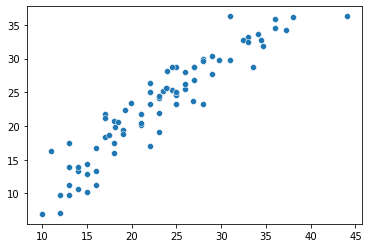

In [113]:
sns.scatterplot( x = Y_test.ravel() , y = Y_pred.ravel())
plt.show()